# ST115 Managing and visualising data

## Workshop 4: Data visualisation in Python

### 2022/23 Lent Term

In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

## Plan

* Perception effectiveness
* Plotting: `Matplotlib`
* Plotting: `Seaborn`
* Project topic

## Activity 4.0

Please fill the survey [here](https://forms.office.com/Pages/ResponsePage.aspx?id=_epnVXfnpUKRu5RA_UO4k9IU9K3OWZRDnfHYZ0uayQlUQlI5QkhZMkxNMzE4RUZUSFlWMDJMSUFSUi4u).

## Different methods of encoding for the same set of data

Which one you find it easier to compare the values?
<center><img src="figs/perception_2.png" width="400"  align="center"/></center>

Source: The truthful art

## Perception effectiveness

<center><img src="figs/perception.png" width="400"  align="center"/></center>

Source: The truthful art

# Creating graphs in Python

## Data

We will illustrate how we can create simple plots using `matplotlib` by the titanic dataset, the coronavirus dataset and the auto dataset that we have seen before:

* Titanic dataset:

In [1]:
import pandas as pd
# here we only use a selection of attributes
titanic = pd.read_csv('data/titanic.csv', usecols = [0, 1, 3, 4, 7])
titanic['Survived'] = pd.Categorical.from_codes(titanic.Survived, 
                                                ['not survived', 'survived'])
titanic['Sex'] = titanic['Sex'].astype('category') 
titanic['Pclass'] = pd.Categorical(titanic['Pclass'], ordered=True) # ordinal

In [3]:
titanic.head()

,Survived,Pclass,Sex,Age,Fare
0,not survived,3,male,22.0,7.2500
1,survived,1,female,38.0,71.2833
2,survived,3,female,26.0,7.9250
3,survived,1,female,35.0,53.1000
4,not survived,3,male,35.0,8.0500


## Data (continue)

* UK coronavirus cases and deaths

In [2]:
cases = pd.read_csv('data/cases.csv', usecols=[3,4], parse_dates=[0], index_col=0)
deaths = pd.read_csv('data/deaths.csv', usecols=[3,4], parse_dates=[0], index_col=0)
covid = cases.join(deaths).dropna()
covid.columns = ['cases', 'deaths']

In [5]:
covid

,cases,deaths
date,,
2022-02-08,58182.0,109.0
2022-02-07,71322.0,125.0
2022-02-06,56503.0,139.0
2022-02-05,48987.0,142.0
2022-02-04,60110.0,152.0
...,...,...
2020-03-06,83.0,0.0
2020-03-05,49.0,3.0
2020-03-04,56.0,0.0


## Data (continue)

In [6]:
auto = pd.read_csv('data/auto-mpg.csv')
auto['origin'] = auto['origin'].astype('category')

In [7]:
auto

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


## `Matplotlib`

Matplotlib is a plotting library for the Python programming language. Most of the Matplotlib utilities are under the `pyplot` submodule.
* `matplotlib.pyplot` provides MATLAB-like plotting
* The module is usually imported under the following way:

In [4]:
import matplotlib.pyplot as plt

## `Matplotlib` (continue)

* If you have not yet installed `matplotlib`, please following the instruction [here](https://matplotlib.org/stable/index.html#installation)
* The version of matplotlib used today is:

In [9]:
import matplotlib
matplotlib.__version__

'3.5.0'

## Distribution for quantitative variable: Histogram

To create a histogram, we can use [`plt.hist()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html) and provide the sequence that we want to visualise its distribution. 
* Example (age of Titanic's passengers):

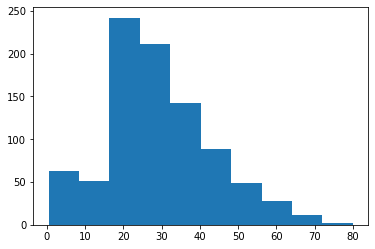

In [10]:
plt.hist(titanic['Age']);

`;` at the end of the code is used to prevent output being printed.

## Histogram: relative frequency

To normalise the histogram, provide the argument `density=True`. For example:

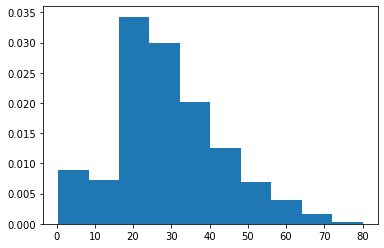

In [11]:
plt.hist(titanic['Age'], density=True);

## Histogram: Number of bins

You can control the number and the width of the bins by using the argument `bins`. For example:
* Controlling the number of bins:

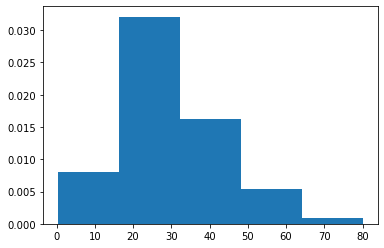

In [12]:
plt.hist(titanic['Age'], density=True, bins = 5);

## Histogram: Number of bins (continue)

* Defining the bins directly:

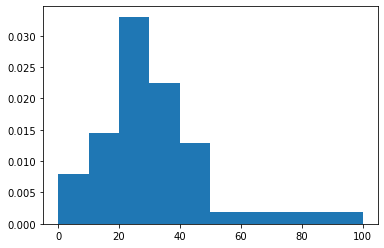

In [13]:
plt.hist(titanic['Age'], density=True, bins = [0, 1, 10, 20, 30, 40, 50, 100]);

## Overlaid histogram

You can draw multiple plots in the same figure by calling the plotting functions multiple times. For example:

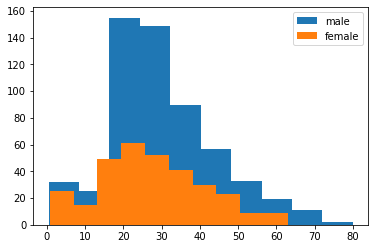

In [14]:
plt.hist(titanic.loc[titanic.Sex == 'male', 'Age'], label = 'male')
plt.hist(titanic.loc[titanic.Sex == 'female', 'Age'], label = 'female')
plt.legend();

[`plt.legend()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html) is used to place the legend in the plot to show which plot is for which category.

## Parts of a `Figure`

<center><img src="figs/anatomy.png" width="600"></center>

## Labelling plots

Use [`plt.title()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.title.html), [`plt.xlabel()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.xlabel.html), [`plt.ylabel()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.ylabel.html) to add/change the title, and labels for x and y axis:

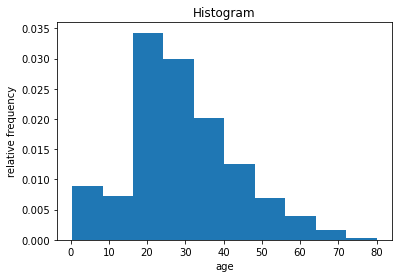

In [15]:
plt.hist(titanic['Age'], density=True)
plt.title('Histogram')
plt.xlabel('age')
plt.ylabel('relative frequency');

## Axis ticks and limits

Use [`plt.xlim()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.xlim.html), [`plt.ylim()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.ylim.html), [`plt.xticks()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.xticks.html) and [`plt.yticks()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.yticks.html) to specify how to format the x and y axis. 
* Example:

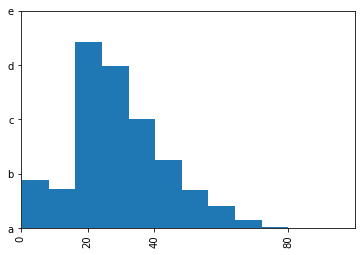

In [16]:
#for illustrative purpose only
import numpy as np
plt.hist(titanic['Age'], density=True)
plt.xlim(0, 100)
plt.xticks([0, 20, 40, 80], rotation = 90)
plt.yticks(np.linspace(0, 0.04, 5), labels=['a', 'b', 'c', 'd', 'e']);

## Customise your plot

We can customise your plot by providing some additional arguments like `color`, `alpha`, etc. For example:

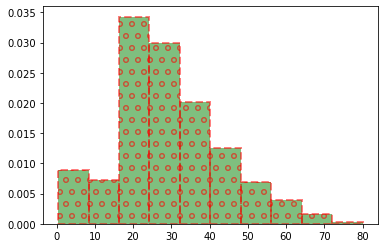

In [17]:
plt.hist(titanic['Age'], density=True, 
         color = 'green', alpha = 0.5, edgecolor = 'red', 
         linestyle = '--', linewidth = 2, hatch = 'o');

Try to change them to different values and see how the plot varies. Also see [here](https://matplotlib.org/stable/tutorials/intermediate/artists.html#customizing-your-objects) to learn more.

## Distribution for numerical variable: Box plot

We can use [`plt.boxplot()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.boxplot.html) to create a box plot:

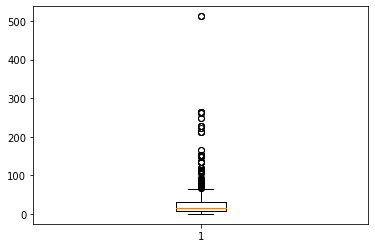

In [18]:
plt.boxplot(titanic['Fare']);

## Axis scale

Use [`plt.xscale()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.xscale.html) and [`plt.yscale()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.yscale.html) to set the scale of the x and y axis. For example:

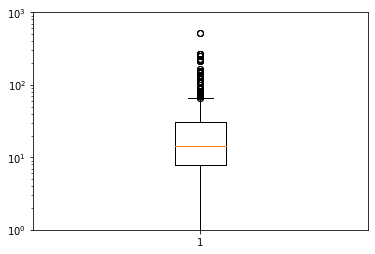

In [19]:
plt.boxplot(titanic['Fare'])
plt.yscale('log');
plt.ylim(1, 1000);

## Use log scale axis vs transform the original data

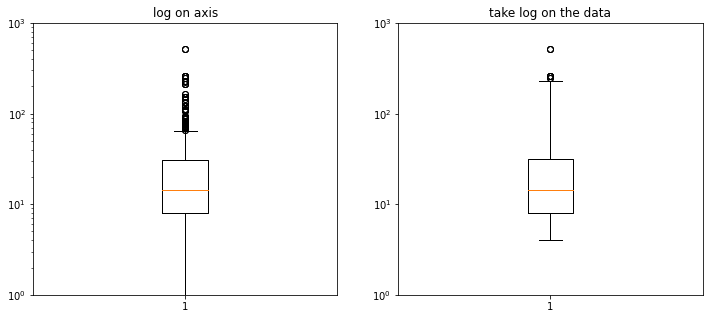

In [20]:
fig, ax = plt.subplots(1, 2, figsize = (12, 5))
ax[0].boxplot(titanic['Fare'])
ax[0].set(yscale='log', ylim=(1, 1000), title='log on axis');
ax[1].boxplot(np.log10(titanic.loc[titanic['Fare']>0, 'Fare']));
ax[1].set_yticks(np.arange(0, 4), labels=[f'$10^{x}$' for x in np.arange(0, 4)]);
ax[1].set_title('take log on the data');

## Distribution for categorical variable: Bar chart

To create a bar chart, we can use [`plt.bar()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html) and provide 2 sequences, one to specify the categories (`x`) and another one for the frequency (`height`). For example:

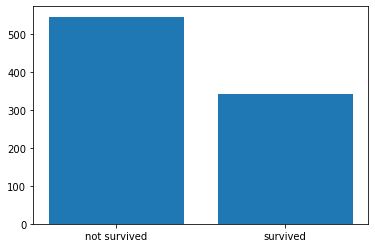

In [21]:
survive_count = titanic.value_counts('Survived')
plt.bar(x=survive_count.index, height=survive_count.values);

Note you need to count the occurrences from the `DataFrame` by yourself.

## Distribution: How about other plots?

It is more convenient to generate them using other libraries:
* Side by side or stacked bar chart: `Pandas`
* Density plot: `seaborn`
* Side by side boxplot: `seaborn` (or `Pandas`)
* Violin plot: `seaborn`


## Relations for a pair of quantitative variables: Scatter plot

To create a scatter plot, we can use [`plt.scatter()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html) and provide 2 sequences that we want to see the relations between them. For example:

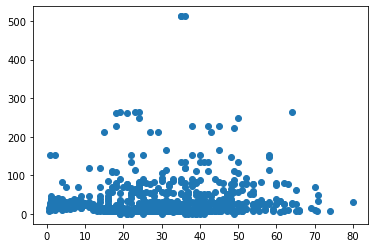

In [22]:
plt.scatter(x = titanic['Age'], y = titanic['Fare']);

## Relations: How about other plots?

It is more convenient to generate:
* Scatter plots with different markers
* Hex plot and contour plot

using `seaborn`.


## Trend for a quantitative variable: line plot

We can use [`plt.plot()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html) to create a line plot.
* Example (number of coronavirus cases and deaths):

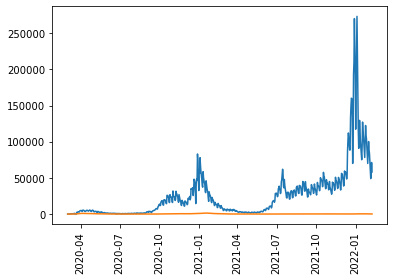

In [23]:
plt.plot(covid.index, covid['cases']);
plt.plot(covid.index, covid['deaths']);
plt.xticks(rotation = 90);

## Plotting multiple subplots in on figure

Use [`plt.subplots()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html) and provide the number of rows (`nrows`) and columns (`ncols`) of plots to create multiple subplots. For example:

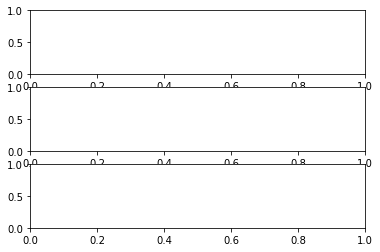

In [24]:
fig, ax = plt.subplots(nrows=3)

In [25]:
ax

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>], dtype=object)

## Plotting multiple subplots in on figure (continue)

To plot on the subplots, and use indexing on `ax` returned from `plt.subplots()` to plot on the corresponding sub plots. 
* Example, `ax[0]` for the left subplot and `ax[1]` for the right subplot:

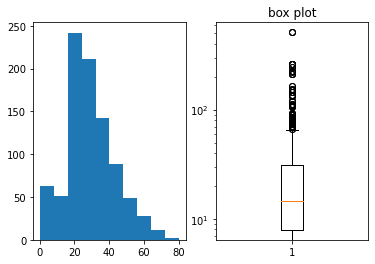

In [26]:
fig, ax = plt.subplots(ncols=2)
ax[0].hist(titanic['Age'])
ax[1].boxplot(titanic['Fare'])
ax[1].set_yscale('log');
ax[1].set_title('box plot');

Note to set the properties of the subplot, now we use `sex_xxxx()` instead of `xxxx()`.

## Plotting multiple subplots in on figure (continue)

Another example:

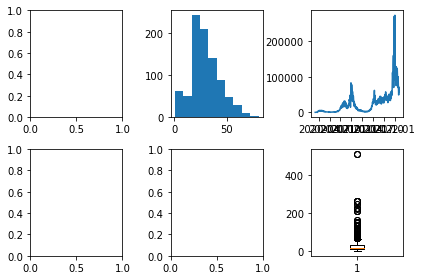

In [27]:
fig, ax = plt.subplots(nrows = 2, ncols = 3)
fig.tight_layout() # this adjusts the padding between and around subplots
ax[0,1].hist(titanic['Age'])
ax[1,2].boxplot(titanic['Fare'])
ax[0,2].plot(covid['cases']);

Notice here `ax` is 2x3 matrix and you need to use matrix-like notation to access the corresponding subplot.

## Controlling figure size

Provide the argument `figsize` to `plt.subplots` to set the figure size. Example:

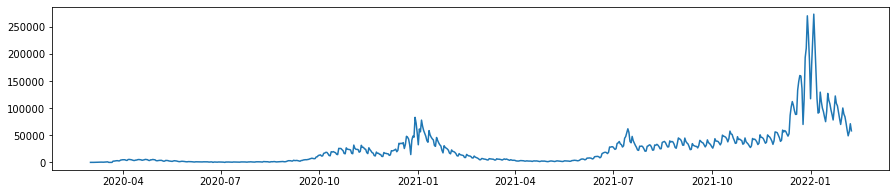

In [28]:
fig, ax = plt.subplots(figsize = (15, 3))
plt.plot(covid.index, covid['cases']);

## Activity 4.1

1. Create 2x1 subplots to show one line plot for the number of cases and another one for the number of deaths. Please do the following:
    * Make sure they share the same x axis for easy comparison
        * Hint: Provide the argument `sharex = True` to [`plt.subplots()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html)
    * Add the y label to indicate what each subplot is showing (cases? deaths?)
2. Create 1x3 subplots to show the boxplot of age from different ticket classes. Make sure they share the same y axis for easy comparison
3. Create 2x2 subplots to show 4 histograms of age with different number of bin widths. Please set the titles of each subplot with the information about the number of bins

1.

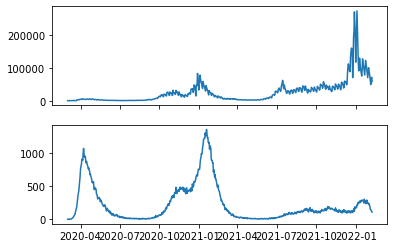

In [7]:
fig, ax = plt.subplots(nrows=2, sharex = True)
ax[0].plot(covid.index, covid['cases'])
ax[1].plot(covid.index, covid['deaths'])

2.

Text(0.5, 1.0, '3')

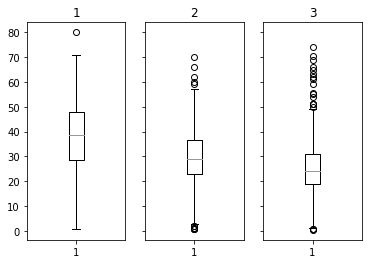

In [19]:
fig, ax = plt.subplots(ncols=3, sharey = True)
ax[0].boxplot(titanic.loc[titanic.Pclass==1, 'Age'])
ax[0].set_title(1)
ax[1].boxplot(titanic.loc[titanic.Pclass==2, 'Age'])
ax[1].set_title(2)
ax[2].boxplot(titanic.loc[titanic.Pclass==3, 'Age'])
ax[2].set_title(3)

3.

(array([0.01218347, 0.00566673, 0.00453338, 0.00991678, 0.03060034,
        0.03796708, 0.03088367, 0.02890032, 0.02295025, 0.01728352,
        0.0124668 , 0.0124668 , 0.00878343, 0.00510006, 0.00425005,
        0.00368337, 0.00141668, 0.00170002, 0.00028334, 0.00028334]),
 array([ 0.42 ,  4.399,  8.378, 12.357, 16.336, 20.315, 24.294, 28.273,
        32.252, 36.231, 40.21 , 44.189, 48.168, 52.147, 56.126, 60.105,
        64.084, 68.063, 72.042, 76.021, 80.   ]),
 <BarContainer object of 20 artists>)

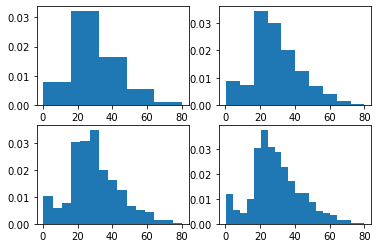

In [12]:
fig, ax = plt.subplots(nrows=2, ncols=2)
ax[0,0].hist(titanic['Age'], density=True, bins = 5)
ax[0,1].hist(titanic['Age'], density=True, bins = 10)
ax[1,0].hist(titanic['Age'], density=True, bins = 15)
ax[1,1].hist(titanic['Age'], density=True, bins = 20)

# Seaborn

## `Seaborn`

Seaborn is a Python data visualization library based on `matplotlib`.
* It provides some additional types of plots, and helps with creating more attractive and informative statistical graphics
* The module is usually imported under the following way:

In [8]:
import seaborn as sns

* We will also use the following style (see [here](https://seaborn.pydata.org/generated/seaborn.set_style.html) for more details):

In [31]:
sns.set_style("darkgrid")

## Distribution for quantitative variables: Histogram 

Use [`sns.displot()`](https://seaborn.pydata.org/generated/seaborn.displot.html) to create histogram in seaborn. For example:

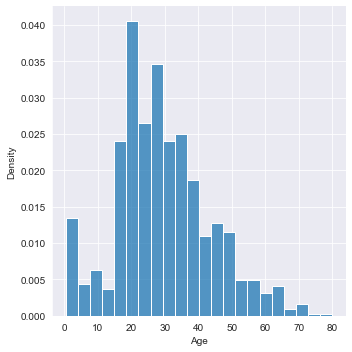

In [32]:
sns.displot(titanic, x = 'Age', stat = 'density');

## Overlapping histogram

To create overlapping histograms, provide additional argument `hue` to specify which categorical variable the histograms should be conditional on. 
* Example:

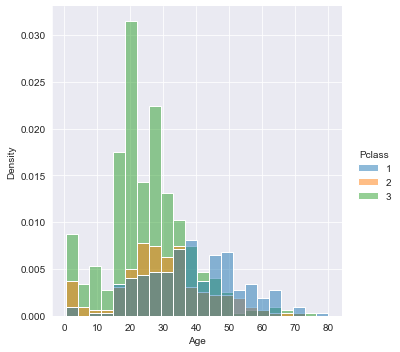

In [33]:
sns.displot(data = titanic, x = 'Age', hue = 'Pclass', stat='density');

## Side by side histogram

Provide additional argument `row` and/or `col` to specify which categorical variable the distribution in the rows / columns should be conditional on. Example:

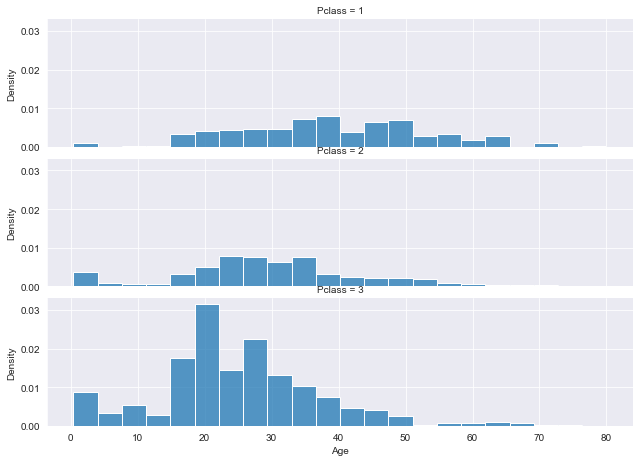

In [34]:
g = sns.displot(data = titanic, x = 'Age', row = 'Pclass', stat='density')
g.fig.set_size_inches(10,6);

## Distribution for quantitative variables: Density plot

To create a density plot, provide the additional argument `kind = 'kde'` to `sns.displot()`. Example:

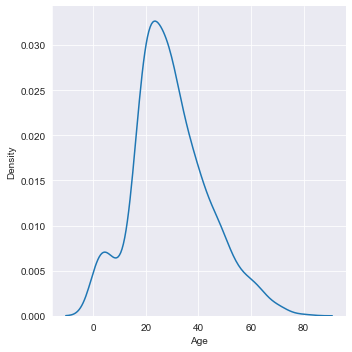

In [35]:
sns.displot(titanic, x = 'Age', kind = 'kde');

## Overlapping density plot

To create an overlapping density plot, provide the additional argument `hue` to specify which categorical variable the overlapping density plots should be conditional on. Example:

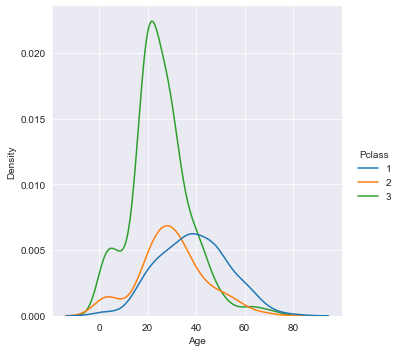

In [36]:
g = sns.displot(titanic, x = 'Age', kind = 'kde', hue = 'Pclass');

## Side by side density plot

Provide additional argument `row` and/or `col` to specify which categorical variable the distribution in the rows / columns should be conditional on. Example:

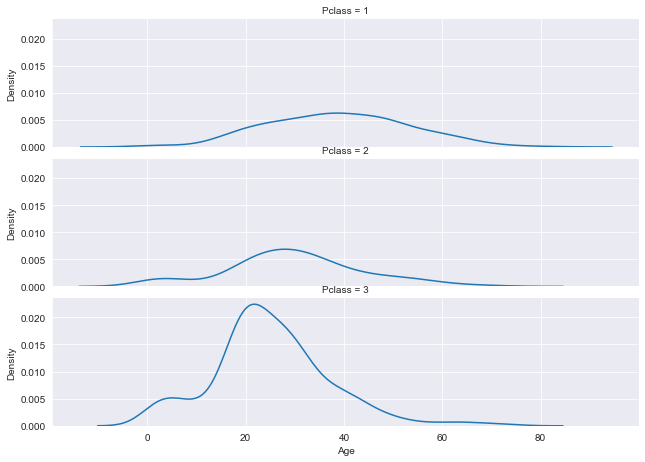

In [37]:
g = sns.displot(titanic, x = 'Age', kind = 'kde', row = 'Pclass');
g.fig.set_size_inches(10,6);

## Distribution for quantitative variables: Box plot

Use [`sns.boxplot()`](https://seaborn.pydata.org/generated/seaborn.boxplot.html) to create boxplot. Example:

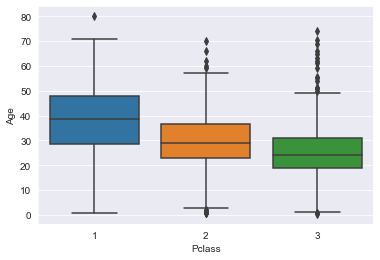

In [38]:
sns.boxplot(data = titanic, x = 'Pclass', y = 'Age');

## Distribution for quantitative variables: Violin plot

Use [`sns.violinplot()`](https://seaborn.pydata.org/generated/seaborn.violinplot.html) to create a violin plot. Example:

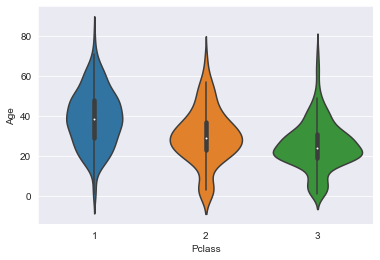

In [39]:
sns.violinplot(data = titanic, x = 'Pclass', y = 'Age');

## Violin plot: one more categorical variable

Provide the argument `hue` to show one more categorical variable. For example:

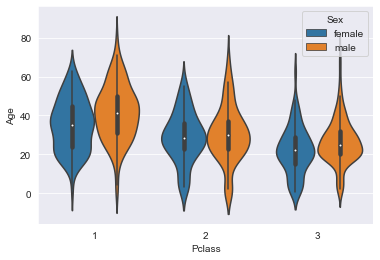

In [40]:
sns.violinplot(data = titanic, x = 'Pclass', y = 'Age', hue = 'Sex');

## Split violin plot

Use `split = True` to get split violin plot. Example:

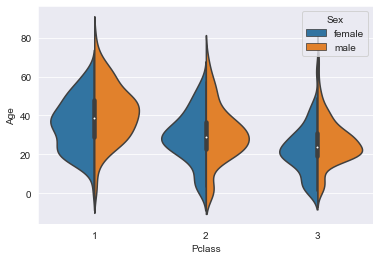

In [41]:
sns.violinplot(data = titanic, x = 'Pclass', y = 'Age', hue = 'Sex', split = True);

## Distribution for categorical variables: Bar chart 

Use [`sns.barplot()`](https://seaborn.pydata.org/generated/seaborn.barplot.html) to create a bar chart. Example:

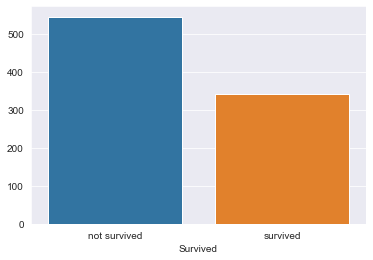

In [42]:
survive_count_count = titanic.value_counts('Survived')
sns.barplot(x=survive_count_count.index, y=survive_count_count.values);

## Bar chart: side by side 

Provide the additional argument `hue` to specify which categorical variable the side by side bars should be conditional on. Example:

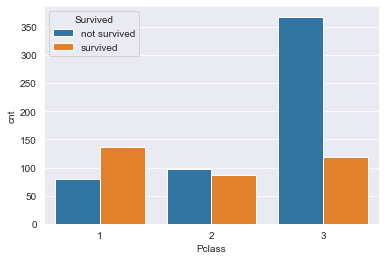

In [43]:
survived = titanic.value_counts(['Pclass', 'Survived']).to_frame().\
 reset_index().rename({0: 'cnt'}, axis = 1)
sns.barplot(data = survived, x = 'Pclass', y = 'cnt', hue = 'Survived');

Note you need to first calculate the number of observations for each group before you can plot the data.

## Relations between a pair of quantitative variables: scatter plot
 
Use [`sns.scatterplot()`](https://seaborn.pydata.org/generated/seaborn.scatterplot.html) to create a scatter plot. For example:

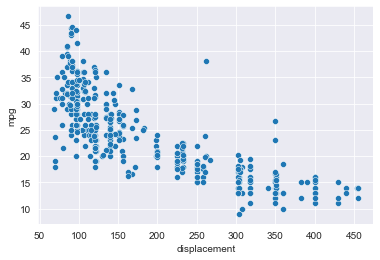

In [44]:
sns.scatterplot(data = auto, x = 'displacement', y = 'mpg');

## Scatter plot: more than 2 variables

Specify `hue`, `size` and/or `style` to show more variables on a scatter plot. Example:

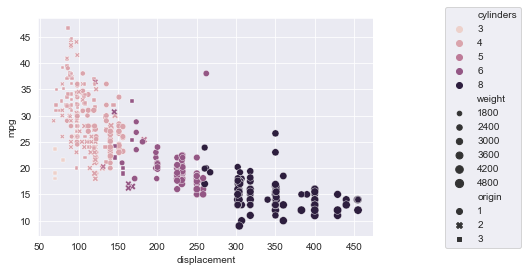

In [45]:
g = sns.scatterplot(data = auto, x = 'displacement', y = 'mpg', hue = 'cylinders',
                    size = 'weight', style='origin')
g.legend(loc='center left', bbox_to_anchor=(1.2, 0.5));

## Scatter plot: with marginal distribution

Use [`sns.joinplot()`](https://seaborn.pydata.org/generated/seaborn.jointplot.html) if you want to visualise both the marginal and join distribution. Example:

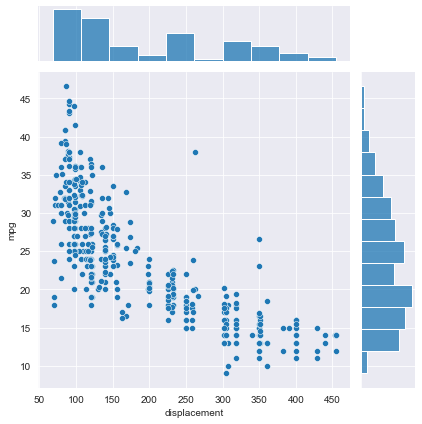

In [46]:
sns.jointplot(data = auto, x = 'displacement', y = 'mpg');

## Hex plot

To create a hex plot, provide the argument `kind = 'hex'` to [`sns.joinplot()`](https://seaborn.pydata.org/generated/seaborn.jointplot.html). Example:

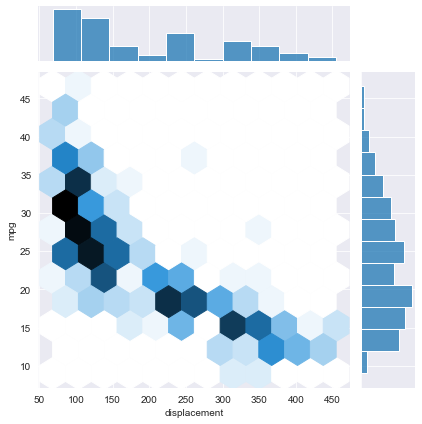

In [47]:
sns.jointplot(data = auto, x = 'displacement', y = 'mpg', kind = 'hex');

## Contour plot

To create a contour plot, provide the argument `kind = 'kde'` to [`sns.joinplot()`](https://seaborn.pydata.org/generated/seaborn.jointplot.html). Example:

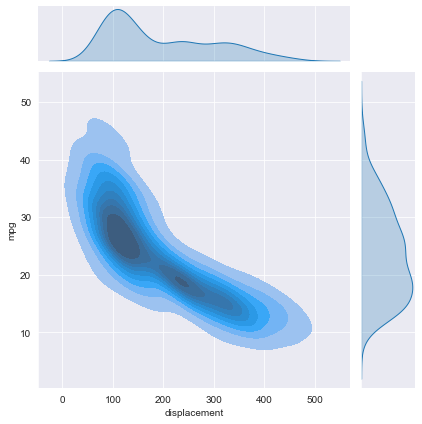

In [48]:
sns.jointplot(data = auto, x = 'displacement', y = 'mpg', kind = 'kde', fill = True);

## Activity 4.2.1

For the `DataFrame` `datasaurus` below (created using the data from [here](https://www.autodesk.com/research/publications/same-stats-different-graphs)), do the following:
1. Calculate the mean, variance and correlation for the variables x and y with the dataset "dino" and "away". What do you observe?
2. Create the scatter plots for the variables x and y for dataset "dino" and "away". What do you observe?

In [21]:
datasaurus = pd.read_csv('data/SameStatsDataAndImages/datasets/DatasaurusDozen.tsv', delimiter='\t')
datasaurus

,dataset,x,y
0,dino,55.384600,97.179500
1,dino,51.538500,96.025600
2,dino,46.153800,94.487200
3,dino,42.820500,91.410300
4,dino,40.769200,88.333300
...,...,...,...
1841,wide_lines,33.674442,26.090490
1842,wide_lines,75.627255,37.128752
1843,wide_lines,40.610125,89.136240
1844,wide_lines,39.114366,96.481751


In [31]:
comb = datasaurus.loc[(datasaurus['dataset'] == 'dino') | (datasaurus['dataset'] == 'away')]
comb

,dataset,x,y
0,dino,55.384600,97.179500
1,dino,51.538500,96.025600
2,dino,46.153800,94.487200
3,dino,42.820500,91.410300
4,dino,40.769200,88.333300
...,...,...,...
279,away,59.851838,72.958391
280,away,48.960460,72.629526
281,away,46.844855,36.791714
282,away,39.963022,42.944915


In [33]:
comb['x'].mean()

54.26468651182078

In [34]:
comb['y'].mean()

47.83348672089274

In [36]:
comb.var()

C:\Users\asus\AppData\Local\Temp\ipykernel_24544\2928561604.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  comb.var()


x    280.155053
y    723.068796
dtype: float64

In [35]:
comb.corr()

,x,y
x,1.0000,-0.0643
y,-0.0643,1.0000


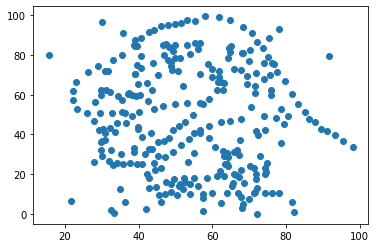

In [37]:
plt.scatter(x = comb['x'], y = comb['y'])

## Activity 4.2.2

1. Use the `DataFrame` `pl_player` below to create a bar chart to show the total player values for each club
2. Create a boxplot and a violin plot to show the distribution of value of the players for each club

In [38]:
pl_player = pd.read_csv('data/pl_player_value.csv')
pl_player

,name,club,position,value
0,Yaser Asprilla,Watford,Attacking Midfield,0.90
1,Moisés Caicedo,Brighton & Hove Albion,Central Midfield,4.05
2,Edo Kayembe,Watford,Defensive Midfield,1.17
3,Luka Ilic,Manchester City,Attacking Midfield,0.72
4,Toti Gomes,Wolverhampton Wanderers,Centre-Back,0.90
...,...,...,...,...
520,Kenedy,Chelsea,Left Midfield,6.30
521,Alfie Whiteman,Tottenham Hotspur,Goalkeeper,0.72
522,Hassane Kamara,Watford,Left-Back,5.40
523,Rhys Williams,Liverpool,Centre-Back,3.60


In [52]:
## your attempt

# Plotting with Pandas

## Plotting with Pandas:

Pandas provides different plot functions to make it easier to create matplotlib plots using pandas `DataFrame` and `Series`. 
* [`hist()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.hist.html):

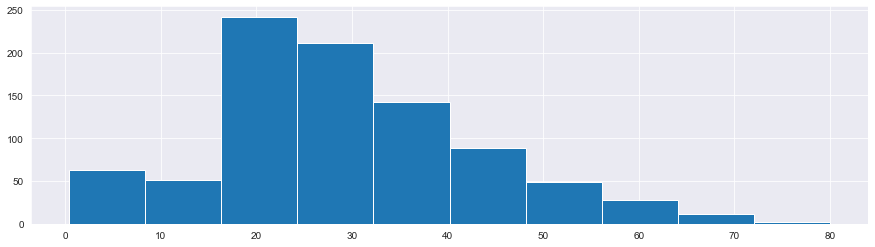

In [53]:
titanic['Age'].hist(figsize = (15, 4));

Note in the workshop we only provide a brief demo on how to use Pandas to plot. See [here](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html) to learn more.

## Plotting with Pandas: boxplot

* [`boxplot()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.boxplot.html):

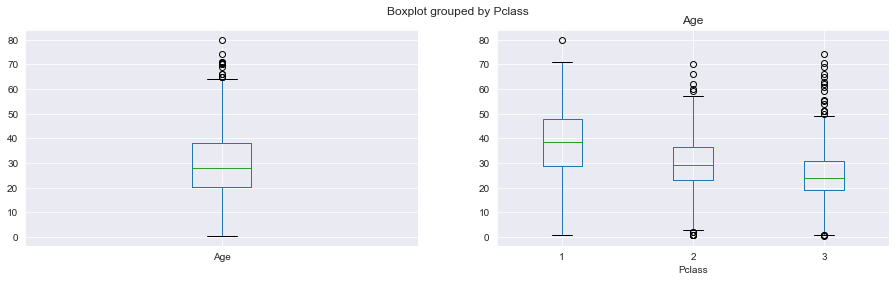

In [54]:
fig, ax = plt.subplots(1,2, figsize = (15, 4))
titanic.boxplot(column = 'Age', ax = ax[0]);
titanic.boxplot(column = 'Age', by = 'Pclass', ax = ax[1]);

## Plotting with Pandas: bar chart

* [plot.bar()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.bar.html):

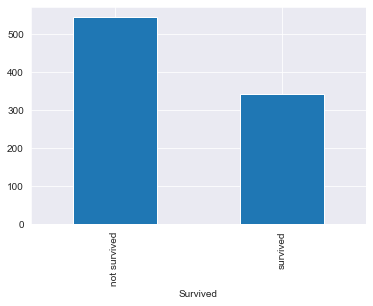

In [55]:
survive_count.plot.bar();

## Bar chart: side by side 
* Side by side:

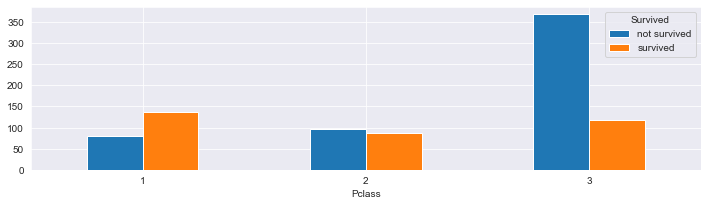

In [56]:
survived = titanic.pivot_table(index='Pclass', columns='Survived', values='Sex', 
                               aggfunc='count')
survived.plot.bar(figsize=(12, 3), rot=0);

## Bar chart: stacked

* Create a stacked bar chart by providing the argument `stacked=True`:

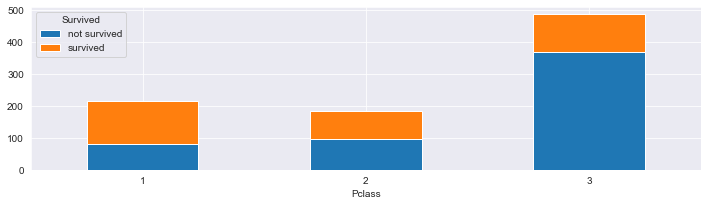

In [57]:
survived.plot.bar(figsize=(12, 3), rot=0, stacked=True);

## Plotting with Pandas: line plot

By default, Pandas use line plot to visualise the data. For example:

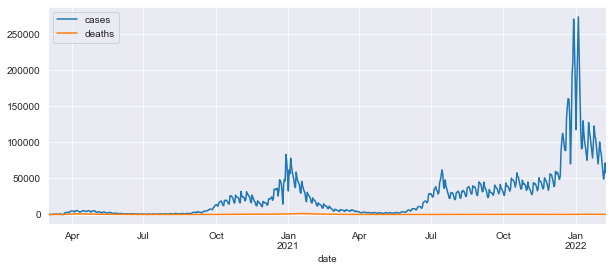

In [58]:
covid.plot(figsize = (10, 4));

If there are multiple columns, Pandas tries to plot each column as each line on the plot.

## Plotting with Pandas: subplots

To plot at separate subplots, use `subplots=True`. For example:

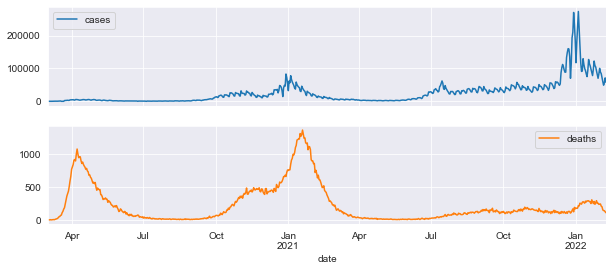

In [59]:
covid.plot(figsize = (10, 4), subplots = True);

# Project

## Project objectives

The project serves as the most important coursework for us to assess your progress in the course in terms of:
* Understanding of the course materials
* Ability to perform the data science project life cycle to answer real life questions using data
* Other skills like self learning skills

## Project topic

Use data analysis to answer some questions related to LSE (London School of Economics).
* Some possible questions/areas to explore:
    * What is the public opinion about LSE?
        * e.g. From news, glassdoor review, twitter, etc.
    * Discover "collaborative network" of academic staff at LSE 
    * How do courses provided by LSE change over time?
        * e.g. Are the courses meeting the demands from the students?
    * Engagement of your department on social media 
        * e.g. Number of likes, replies, followers, etc.
        
The questions listed above are just some examples. Please set your own question to answer.

## Things to consider when setting the question

* You are advised to select a project question that allows you to showcase most (if not all) of the skills you are expected to master 
    * e.g. If all the data that you are using is already ready to be downloaded by a click and clean, you will then not be able to show your skills on data collection (e.g. via webscraping or API) and data wrangling
    * It is okay if you are not going to demonstrate skills learned from week 9 and week 10
* You may want to select the topic you have a better domain knowledge of
* Given we are not going to talk about web scrapping or API till week 8, it is possible at a later stage you realise it is not possible for you to collect the data that you want to collect. Therefore, you may want to think about some "backup" plans as well

## Project proposal 

State in your project proposal:
* What is the main question that you want to answer?
* Why you want to answer the question? What is the significance of answering the question?
* How you are going to answer the question?
    * What data you are going to use to answer the question?
    * How you are going to collect the data ?
        * You are advised to have at least some parts of the data collected through web scrapping or API
    * Preliminary steps you are going to take to answer the question

## Project proposal submission

* The proposal should be not more than 1 page long
* Please submit as pdf
* Please hand in the project proposal by week 7 Thursday noon on Moodle (submission portal will be open in week 6)
* You will get feedback about your choice of project question in 2 weeks time
* You are allowed to change the project question later, if you found later that you are not able to get the data that you need

## Summary

* Perception effectiveness
* Data visualisation in Pandas


## Next step

* Problem set 4: due next Thursday 12pm noon
* Visit the python code on the lecture slides
* Readings:
    * [Matplotlib tutorial](https://matplotlib.org/stable/tutorials/introductory/usage.html#sphx-glr-tutorials-introductory-usage-py)
    * [Seaborn tutorial](https://seaborn.pydata.org/tutorial.html): Plotting functions
    * [Pandas visualisation tutorial](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html)
    * Data Visualization Fundamentals part of the [Python pre-sessional course](https://moodle.lse.ac.uk/course/view.php?id=7696)